In [10]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
from pylab import array
from pylab import ginput


%matplotlib inline


In [11]:
def show_image(image, title='', axes='off'):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray', interpolation='nearest')
    ax.axis(axes)
    ax.set_title(title)

In [27]:
def show_images(images, titles=[]):
    num_images = len(images)
    num_titles = len(titles)
    fig, ax = plt.subplots(nrows=2, ncols=num_images, figsize=(10, 10))
    
    for i in range(0, num_images):
        ax[0,i].hist(images[i].flatten(), 128)
        ax[1,i].imshow(images[i], cmap='gray', interpolation='nearest')
        ax[1,i].axis('off')
        title = titles[i] if i < num_titles else ''
        ax[1,i].set_title(title)

In [13]:
im = np.array(Image.open('images/Edison.jpg').convert('L'))

Text(0.5,1,'Original')

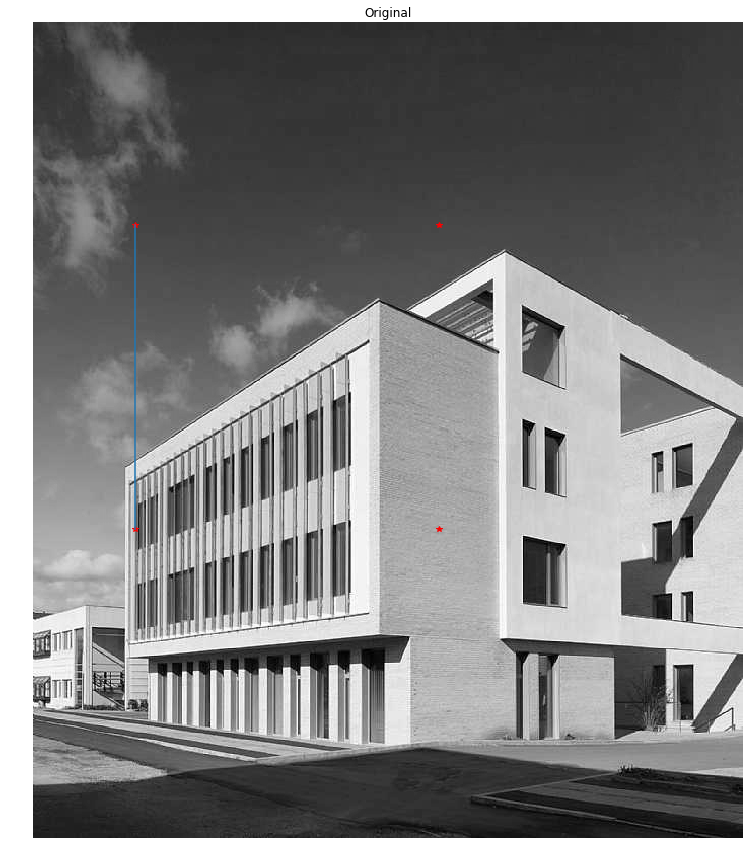

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))

# plot the image
ax.imshow(im, cmap='gray', interpolation='nearest')

# some points
x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
ax.plot(x,y,'r*')

# line plot connecting the first two points
ax.plot(x[:2],y[:2])

# remove the axes
ax.axis('off')

ax.set_title('Original')

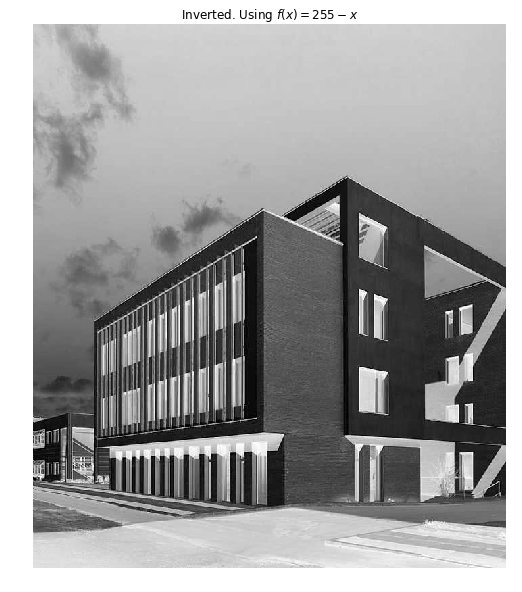

In [15]:
show_image(255-im, title='Inverted. Using $f(x)=255-x$')

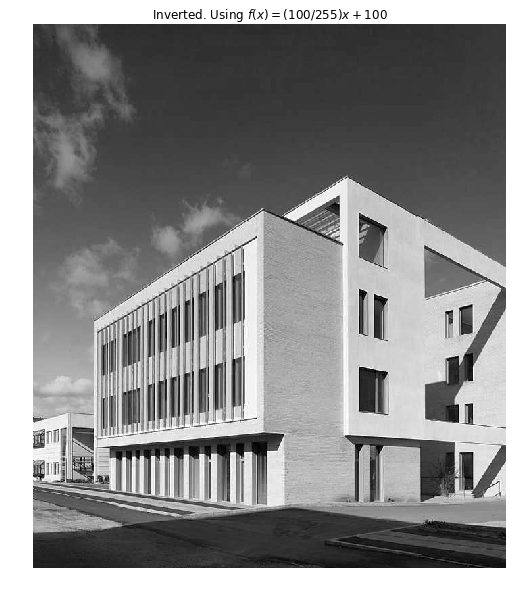

In [16]:
# clamp the intensities to the interval 100 to 200
show_image((100/255.0)*im+100, title='Inverted. Using $f(x)=(100/255)x+100$')

## Histogram equalisation

Histogram equalization is a transformation that flattens the graylevel histogram of an image so that all intensities are as equally common as possible. This is often a good way to normalize image intensity before further processing and also a way to increase image contrast.

In [17]:
def histogram_equalise(image, number_bins=256):
    """ Histogram equalization of a grayscale image. """
    
    # Get image histogram
    imhist, bins = np.histogram(image, bins=number_bins, normed=True)
    
    # Get the cumulative distribution function
    cdf = imhist.cumsum() 
    
    # Use the last value of the CDF to normalise it between 0 and 1.
    cdf = 255 * cdf / cdf[-1]
    
    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape), cdf

In [18]:
im_he, cdf = histogram_equalise(im)

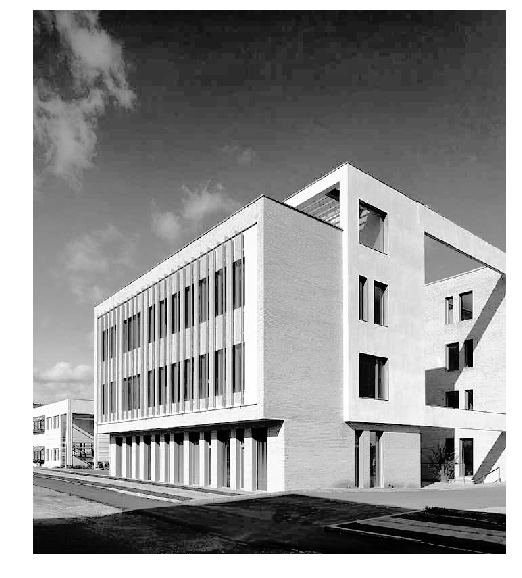

In [19]:
show_image(im_he)

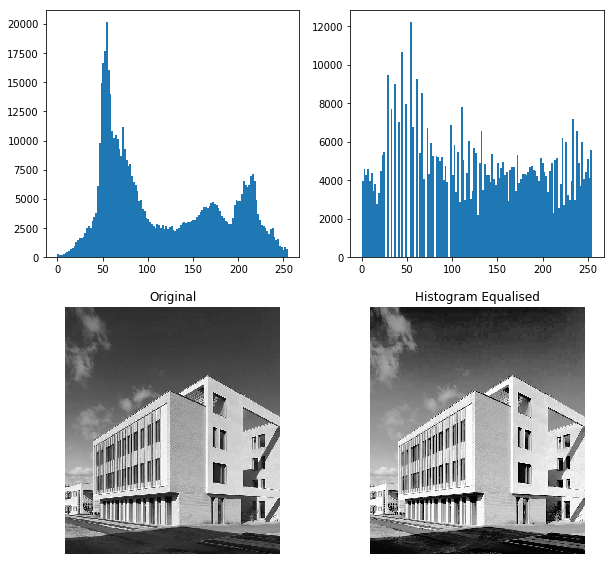

In [28]:
show_images([im, im_he], titles=['Original', 'Histogram Equalised'])